# Self-Driving Car Engineering project

## Deep Learning

## Traffic Sign Recognition Classifier

---
## Step 0: Load The Data

After downloading the training set, unzip the compressed file and move test.p and train.p in the main directory of your project.
The training set contains more then 50000 images labelled through more then 40 classes. The images was resized 32x32

In [45]:
# Load pickled data
import pickle

#You can change the path if you prefer change the training set files in another directory
training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [46]:
import numpy as np

### Replace each question mark with the appropriate value.

# Number of training examples
n_train = len(X_train)

# Number of testing examples.
n_test = len(y_train)

# The shape of an traffic sign image
image_shape = X_train[0].shape

# Number of classes
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 39209
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

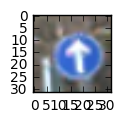

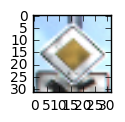

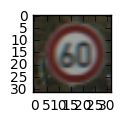

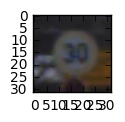

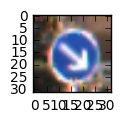

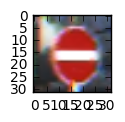

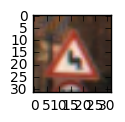

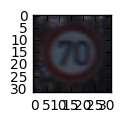

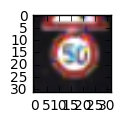

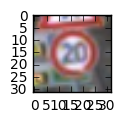

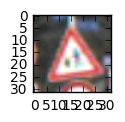

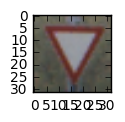

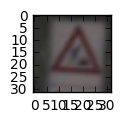

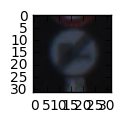

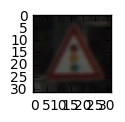

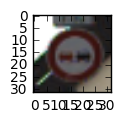

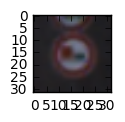

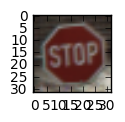

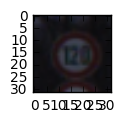

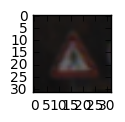

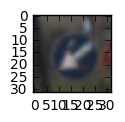

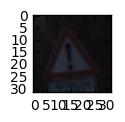

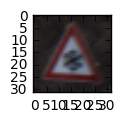

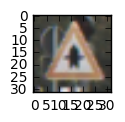

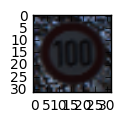

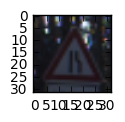

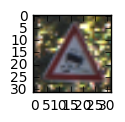

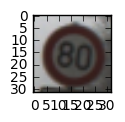

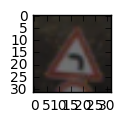

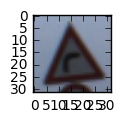

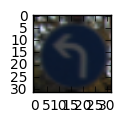

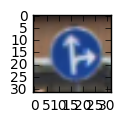

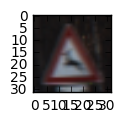

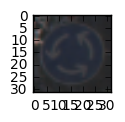

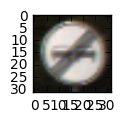

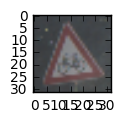

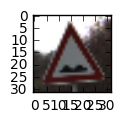

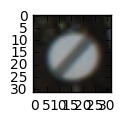

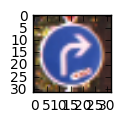

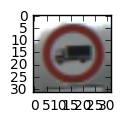

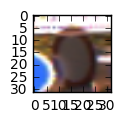

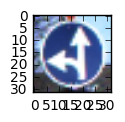

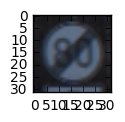

In [47]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

# I created a code that search and display traffic signs of each distinct class
# Display viz could be improved
import random
import numpy as np
import matplotlib.pyplot as plt 
plt.rcParams.update({'figure.max_open_warning': 0})
%matplotlib inline


sign_list = []
while len(sign_list) < 43:
    index = random.randint(0, len(X_train))
    if y_train[index] not in sign_list:
        sign_list.append(y_train[index])
        image = X_train[index].squeeze()
        plt.figure(figsize=(1,1))
        plt.imshow(image)

----

## Step 2: Design and Test a Model Architecture


### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [23]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** The data was preprocessed using sklearn.utils.shuffle that proceeds to a random permutation of X_train and y_train elements. By randomising the order of the training set, this process keeps us from using an ordered training set that could affect our algorithm learning.

In [24]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train,y_train, test_size=0.2,random_state=0)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** We used sklearn train_test_split in order to split the available dataset into a training set and, test and validation. In our case, we're using 80% of the available data to train our model and 20% to test its performance.

In [25]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
 
EPOCHS = 10
BATCH_SIZE = 200

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    mu = 0
    sigma = 0.1
    
#Part 1
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
#Part 2
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

#Part 3
    fc0   = flatten(conv2)
    
#Part 4
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    fc1    = tf.nn.relu(fc1)

#Part 5
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    fc2    = tf.nn.relu(fc2)

#Part 6
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits


# x is a placeholder to store input batchs. init to None to accept any batc in any size
x = tf.placeholder(tf.float32, (None, 32, 32, 3))

# labels are'nt one hot encoded yet !
y = tf.placeholder(tf.int32, (None))

# One hot encode the labels
one_hot_y = tf.one_hot(y, 43)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**


**Part 1:**
As suggested, we used LeNet architecture in order to implement our convolutional neural network. We started by building our first convolutional layer that output into 5X5X3 dimension filters with a depth of 6. In this cas we used a stride of 1 and a padding equal to 0 (refers to padding = padding='VALID'). Then we used a ReLU activation fonction where its output will be propagated to a pooling function (Max Pooling in our case) the Convolution layer output using 2x2 Kernal and 2x2 strides.

**Part 2:**
This the block 2, we continue the pipeline with a second convolutional layer that will proceed in the same way as the 1st one. It will use the 1st layer output as a parameter that will be multiplied by the second layer weights in order to calculate the output height and width. Like the 1st layer, we used a ReLU activation function and a Max Pooling function.

**Part 3:**
We make the output of the previous pipeline flat. This mean that we transform the 3D input data to an 1 dimension vector.

**Part 4:**
The previous pipeline output was propagated into a the 3rd layer which is fully Connected. At that level we multiply the received inputs by the weights and we adds the bias. Then we apply a ReLU activation function.

**Part 5:**
Same process than the previous bloc. This layer will receive even less input features.

**Part 6:**
Same thing in the bloc 6. We end the whole process by obtaining the logits that will demonstrates the predicted label performed by our model.

In [26]:
### Train your model here.
rate = 0.001

logits = LeNet(x)

#Part 1
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


#Part 2
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    #Batch the dataset and run it through the evaluation pipeline
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        #Average the accuracy of each batch
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


#Training execution
with tf.Session() as sess:
    #We initialize the variables
    sess.run(tf.initialize_all_variables())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        #in each epoch we shuffle our training data
        X_train, y_train = shuffle(X_train, y_train)
        
        #Put the training data by batch
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            #Train the model in each batch
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        #Each epoch we evaluate the model
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    #In the end we save the model    
    saver.save(sess, 'lenet')
    print("Model saved")

    
#Evaluate the model on a Test dataset
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Training...

EPOCH 1 ...
Validation Accuracy = 0.523

EPOCH 2 ...
Validation Accuracy = 0.708

EPOCH 3 ...
Validation Accuracy = 0.771

EPOCH 4 ...
Validation Accuracy = 0.843

EPOCH 5 ...
Validation Accuracy = 0.859

EPOCH 6 ...
Validation Accuracy = 0.860

EPOCH 7 ...
Validation Accuracy = 0.886

EPOCH 8 ...
Validation Accuracy = 0.881

EPOCH 9 ...
Validation Accuracy = 0.908

EPOCH 10 ...
Validation Accuracy = 0.902

Model saved
Test Accuracy = 0.805


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

**Part 1:**
We started by using softmax_cross_entropy_with_logits that produce the cross entropy that measure the difference between the obtained logits and the true labels 'y'. Once obtained, we measure the averaged cross entropy for all the used images.To reduce the loss, we used Adam algorithm based optimizer. This optimized was iterating with a learning rate equal 0.001.

**Part 2:**
To evaluate the model accuracy, the evaluation was configurated by batchs. The evaluation mechanism evaluate 128 images batch each time and calculate its accuracy.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** 

The convolutional neural net works well and answers correctly to our specific need. I'm actually working on several hyperparameters tuning in order to improve the model's prediction:
- Learning rate: from 0.001 to 0.0001
- sigma: from 0.1 to 0.2
- mu: from 0 to 0.1
- batch size: from 128 to 200

What I learned ?
Batch size changed a little bit the prediction performance. No lot of positive effect whenwe change learning rate or sigma and dramatically negative effect by changing the momentum. We also understand the need to improve training set classes equilibrium.

I joined a file including prediction result using the different hyperparameters configuration

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

here is a list of new images:


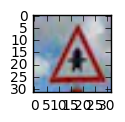

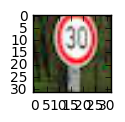

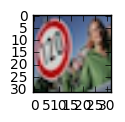

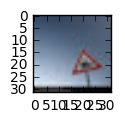

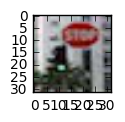

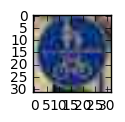

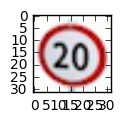

In [27]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from os import listdir
from PIL import Image as PImage                                                            
import numpy                                                                     
import matplotlib.pyplot as plt                                                  
import glob

%matplotlib inline
imageFolderPath = 'img/'
im_array = np.array([])
imagesList = []

imagesList = listdir(imageFolderPath)
nbr_examples = len(imagesList)

print('here is a list of new images:')
i=0
while i<len(imagesList):
    im = PImage.open(imageFolderPath+imagesList[i])
    plt.figure(figsize=(1,1))
    plt.imshow(im)
    im_array = numpy.array([numpy.array(PImage.open(imageFolderPath+imagesList[i]))])
    i = i+1

### Question 6
_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._
### Discussion:
The model have some lack to classify some traffic signs. A reason could be related to the lack of equilibrium between the different classes. In fact, our model could be trained to recognize a sign S' much more than a sign S''. So when we try to classify a new image that should be labelled as S'', the model will struggle in the prediction.


**Answer:**
We notice a clear performance drop when it's a question of classifying new data. When the models classify the new data prediction, we obtain an averaged accuracy near to the 40%, however, the model prediction accuracy on the training set was approximatally 80%. As a result, our model did not perform well in the real world situation. The possible reasons would be related to the images perspectives. In fact, I choose images when the traffic sign was snapped from several angles what is different from the image set used for training.

In [44]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    #print ("Model restored.")

    #Test for few samples:
    print('Let us see how much our model is able to classify them correctly:')
    ex1 = numpy.array([numpy.array(PImage.open(imageFolderPath+imagesList[1]))])
    ex2 = numpy.array([numpy.array(PImage.open(imageFolderPath+imagesList[6]))])
    ex3 = numpy.array([numpy.array(PImage.open(imageFolderPath+imagesList[4]))])
    ex4 = numpy.array([numpy.array(PImage.open(imageFolderPath+imagesList[2]))])
    ex5 = numpy.array([numpy.array(PImage.open(imageFolderPath+imagesList[3]))])
    
    ex1 = ex1.astype(numpy.float32, copy=False)
    ex2 = ex2.astype(numpy.float32, copy=False)
    ex3 = ex3.astype(numpy.float32, copy=False)
    ex4 = ex4.astype(numpy.float32, copy=False)
    ex5 = ex5.astype(numpy.float32, copy=False)
    
    test_accuracy1 = evaluate(ex1, y_test)
    print("Test Accuracy for the example 1= {:.3f}".format(test_accuracy1))
    test_accuracy2 = evaluate(ex2, y_test)
    print("Test Accuracy for the example 2= {:.3f}".format(test_accuracy2))
    test_accuracy3 = evaluate(ex3, y_test)
    print("Test Accuracy for the example 3= {:.3f}".format(test_accuracy3))
    test_accuracy4 = evaluate(ex4, y_test)
    print("Test Accuracy for the example 4= {:.3f}".format(test_accuracy4))
    test_accuracy5 = evaluate(ex5, y_test)
    print("Test Accuracy for the example 5= {:.3f}".format(test_accuracy5))
    test_accuracy5 = evaluate(ex5, y_test)
    
    
    avr_accuracy_new = (test_accuracy1 + test_accuracy2 + test_accuracy3 + test_accuracy4 + test_accuracy5) / 5
    diva_accuracy = test_accuracy-avr_accuracy_new
    
    print("Accuracy for the 5 images= {:.3f}".format(average_acc))     
    
    # ex = np.dtype(np.float64)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Let us see how much our model is able to classify them correctly:
Test Accuracy for the example 1= 0.050
Test Accuracy for the example 2= 0.055
Test Accuracy for the example 3= 0.030
Test Accuracy for the example 4= 0.040
Test Accuracy for the example 5= 0.020
Accuracy for the 5 images= 0.039


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

numpy.set_printoptions(threshold=numpy.nan)
#Here's the same function applied in our sample
    
with tf.Session() as sess:
    
    a = tf.constant(ex3)
    b = LeNet(ex3)
    print(sess.run(tf.nn.softmax(a)))
    print(sess.run(tf.nn.top_k(a, k=3)))

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

I learned that Tensoflow top_k create a sort of rank of the obtained probability. It helps the developper the localize sets where the model failed.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.